In [142]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
#pd.set_option('max_columns', 100)

py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot

pd.set_option('max_columns', 1000)
from bokeh.models import Panel, Tabs
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
import plotly.figure_factory as ff
import gc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder

#!pip install plotly

from wordcloud import WordCloud

#!pip install wordcloud

import json
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import Counter as cc

import requests, json

import plotly.graph_objects as go

from scipy.interpolate import interp1d
import calendar

In [144]:
# Setting Configs

%matplotlib inline

!pip install mpld3 
import mpld3
mpld3.enable_notebook()

plt.rc('figure', figsize=(15.0, 8.0))

sns.set_style("whitegrid", {"xtick.major.size": 14, "ytick.major.size": 14})

  Stored in directory: C:\Users\Window\AppData\Local\pip\Cache\wheels\38\68\06\d119af6c3f9a2d1e123c1f72d276576b457131b3a7bf94e402
Successfully built mpld3


## Reading + Pre-processing Data: 

In [45]:
# Reading provided data:

train = pd.read_csv(r"C:\Users\Window\Documents\Keras_LSTM_labeled.csv")
print(train.shape)

train = train.where(pd.notnull(train), 0)
train = train.astype({"display_text_width": int, "favorite_count": int, "retweet_count": int, "anger": int, "anticipation": int, "disgust": int, "fear": int, "joy": int, "love": int, "optimism": int, "pessimism": int, "sadness": int, "surprise": int, "trust": int})

# The reds are meant to show the alarming increase in cases based on count comparison.
#train.head().style.background_gradient(cmap='Reds')

#print(train.dtypes)

#train.rename(columns={"('anger',)":"anger", "('anticipation',)":"anticipation", "('disgust',)":"disgust", "('fear',)":"fear", "('joy',)":"joy", "('love',)":"love", "('optimism',)":"optimism", "('pessimism',)":"pessimism", "('sadness',)":"sadness", "('surprise',)":"surprise", "('trust',)":"trust"}, inplace = True)

train

(232070, 23)


,status_id,user_id,date,time,text,is_quote,display_text_width,favorite_count,retweet_count,hashtags,symbols,lang,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,1240849521011113984,840438614,2020-03-20,03:55:54,corona time,False,43,0,0,0,0,en,0,0,0,0,0,0,1,1,0,1,0
1,1240849520381976576,1143505456121307136,2020-03-20,03:55:54,flexing king u+0001f525,True,16,0,0,0,0,en,0,0,0,0,0,0,0,0,1,0,0
2,1240849519727857664,3449353153,2020-03-20,03:55:54,everyone looks sick,False,67,0,51508,0,0,en,1,0,1,0,0,0,0,0,0,0,0
3,1240849521866952704,1511537016,2020-03-20,03:55:54,corona day 3 feels like sunday,False,73,0,89818,0,0,en,0,0,1,0,1,0,0,0,0,0,0
4,1240849528414244864,334488003,2020-03-20,03:55:56,everyone stay home please corona fucks quickly...,False,140,0,25397,0,0,en,0,0,0,1,0,0,1,0,0,0,0
5,1240849525423706112,1025415844678049792,2020-03-20,03:55:55,generation z want name folks love calling ever...,False,139,0,103708,0,0,en,1,1,0,0,0,0,1,0,1,0,0
6,1240849522248404992,1010036490066276352,2020-03-20,03:55:54,hundreds indian doctors frontline covid19 cris...,False,140,0,310,COVID19,0,en,0,0,0,0,0,0,1,1,0,1,0
7,1240849525109112832,958174420543131648,2020-03-20,03:55:55,kalamojakka prayingmedic literally spokesperso...,False,121,5,0,0,0,en,0,1,0,0,0,0,1,0,0,0,0
8,1240849520994349056,1080013276459593729,2020-03-20,03:55:54,coronavirus basic general name type virus crow...,False,140,0,6916,0,0,en,1,0,1,0,0,0,1,0,0,0,0
9,1240849518540677120,1228076185453649920,2020-03-20,03:55:53,jsthefanieeet jughkook animal crossing u+0001f...,False,19,1,0,0,0,en,0,0,0,0,1,1,1,0,0,0,1


## Correlation Plot of Predicted Data: 

,favorite_count,retweet_count,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
favorite_count,1.000000,-0.000164,-0.000196,0.004336,-0.001435,-0.001534,0.008501,0.006314,0.003038,-0.001159,-0.000571,0.007127,0.007646
retweet_count,-0.000164,1.000000,0.006491,0.001654,0.007315,0.016738,-0.002618,-0.012752,-0.005137,0.002466,0.020512,0.005308,-0.008788
anger,-0.000196,0.006491,1.000000,-0.365046,0.599932,-0.021567,-0.064320,-0.043226,-0.314877,0.092808,0.128123,-0.061213,-0.130726
anticipation,0.004336,0.001654,-0.365046,1.000000,-0.349919,0.007746,-0.022257,0.093721,0.363075,-0.113193,-0.053721,-0.093167,0.119154
disgust,-0.001435,0.007315,0.599932,-0.349919,1.000000,-0.064273,0.036486,-0.175277,-0.265908,0.112344,0.116600,-0.013089,-0.177431
fear,-0.001534,0.016738,-0.021567,0.007746,-0.064273,1.000000,-0.071216,-0.140752,-0.073396,0.132146,0.504359,0.113185,-0.012107
joy,0.008501,-0.002618,-0.064320,-0.022257,0.036486,-0.071216,1.000000,0.094444,0.131397,-0.054577,-0.027297,0.038105,0.154525
love,0.006314,-0.012752,-0.043226,0.093721,-0.175277,-0.140752,0.094444,1.000000,0.299316,-0.066283,-0.151439,-0.023091,0.455991
optimism,0.003038,-0.005137,-0.314877,0.363075,-0.265908,-0.073396,0.131397,0.299316,1.000000,-0.056409,-0.170006,0.140830,0.466904
pessimism,-0.001159,0.002466,0.092808,-0.113193,0.112344,0.132146,-0.054577,-0.066283,-0.056409,1.000000,0.075219,0.326875,-0.054403


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5]), <a list of 13 Text xticklabel objects>)

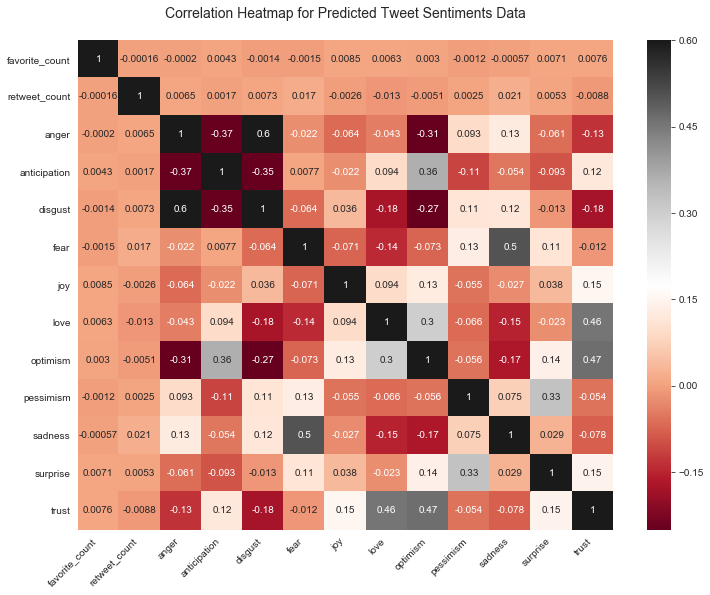

In [47]:
## Plot 1:-

corrtrain = train
corrtrain = corrtrain.drop(['status_id', 'user_id', 'display_text_width', 'is_quote'], axis = 1) 

corrs = corrtrain.corr()
display(corrs)

plt.figure(figsize = (12, 9))

# Heatmap of correlation

#sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6
#sns.heatmap(corrs, cmap = "YlGnBu", vmin = -0.25, annot = True, vmax = 0.6)
sns.heatmap(corrs, cmap = "RdGy", vmin = -0.25, annot = True, vmax = 0.6)

            
plt.title('Correlation Heatmap for Predicted Tweet Sentiments Data\n', fontsize = 14)
plt.xticks(rotation=45, horizontalalignment='right')

## Top 10 Common Words Plot: 

<function matplotlib.pyplot.show(*args, **kw)>

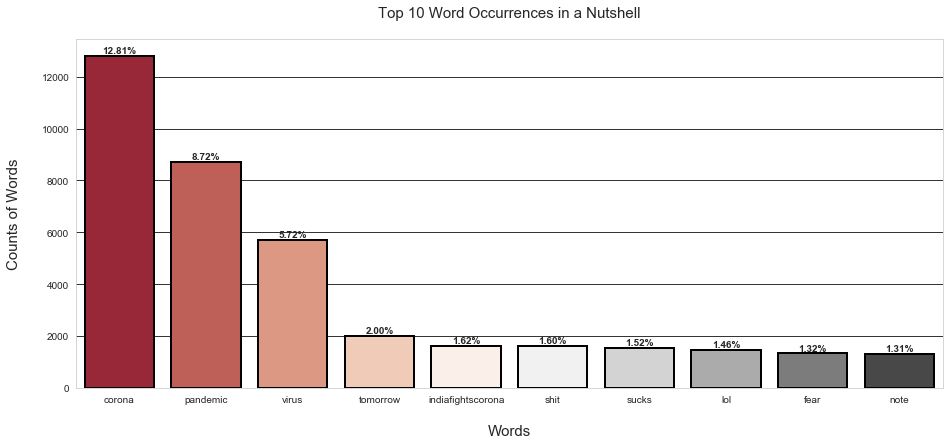

In [49]:
new = train["text"].str.split()
newdf = new.str[-1]

fl = list(newdf)
fll = [item for item in fl if str(item).isalpha()]

count = cc(fll) 
most_occur = count.most_common(10) 
mo = pd.DataFrame(most_occur)

#display(mo)
#mo = mo.replace(to_replace ="fucked", value ="screwed") 

#print(mo)

figure, myaxis = plt.subplots(figsize=(13, 6))

#plt.figure(figsize=(13, 6))

sp = sns.barplot(x=0, data=mo, y = mo[1], palette="RdGy", edgecolor='black', linewidth=2)

Total = float(mo[1].sum())

#total = float(len(mo))

# For Percentages:
for p in myaxis.patches:
    height = p.get_height()
    myaxis.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format((height/total)/100),
            ha="center", va='center', fontweight='bold') 
    
# For Counts:
#for s in sp.patches:
#    sp.annotate(s.get_height(), (s.get_x() + s.get_width()/2, s.get_height()), ha='center', va='center', \
#                xytext=(0, 10), textcoords='offset points', fontweight='bold')
    
plt.title('Top 10 Word Occurrences in a Nutshell\n', fontsize = 15)
plt.tight_layout()
plt.xticks(rotation=360, size = 10)

myaxis.set_xlabel("\nWords", fontsize = 15);
myaxis.set_ylabel("Counts of Words\n", fontsize = 15)

myaxis.grid(axis='y', alpha=4, color='black')
myaxis.set_axisbelow(True)
plt.show

## Word Cloud of Frequent Words in Tweets:

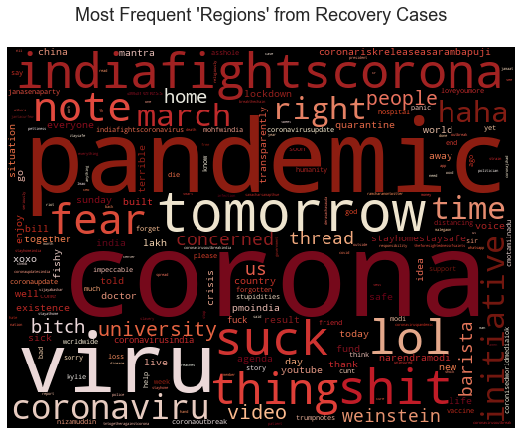

In [53]:
new = train["text"].str.split()
newdf = new.str[-1]

fl = list(newdf)
title_words = [item for item in fl if str(item).isalpha()]

title_words = [incom for incom in title_words if str(incom) != 'nan']

plt.subplots(figsize=(14,7))
wc=wordcloud = WordCloud( collocations=False,
                          background_color='black',
                          width=512,
                          height=384
                         ).generate(" ".join(title_words))

plt.imshow(wc)
plt.axis('off')
plt.title("Most Frequent 'Regions' from Recovery Cases\n", fontsize=18)
plt.imshow(wc.recolor(colormap= 'Reds', random_state=2), alpha=0.90)

plt.show()

## Opposing Emotion Comparison Plots: 

In [98]:
def plot_count(feature, title, df, size=4):
    
    rows, cols = 1, 1
    
    f, ax = plt.subplots(rows, cols, figsize=(9, 7), sharex='col', sharey='row')
    
    total = float(len(df))
    
    g = sns.countplot(df[feature], order = df[feature].value_counts().index[:20], palette='Set1', edgecolor='black', linewidth=2)
    g.set_title(format(title), fontsize=14)


    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x()+p.get_width()/2.,
                    height + 3,
                    '{:1.2f}%\n\n'.format(100*height/total),
                    ha="center", va='center', fontweight='bold')
    
    ax.set_xlabel('\n{}'.format(feature), fontsize = 15);
    ax.set_ylabel("Counts of Words\n", fontsize = 15)
    ax.grid(axis='y', alpha=4, color='black')
    ax.set_axisbelow(True)
    
    plt.xticks([0, 1], ["Did not Occur", "Occurred"], fontsize=14)
    plt.show()

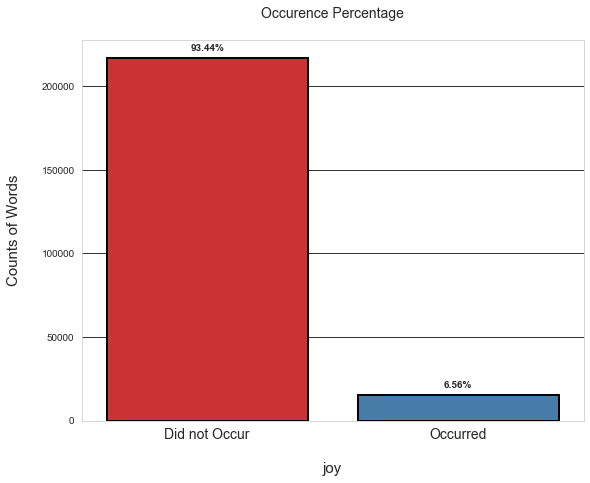

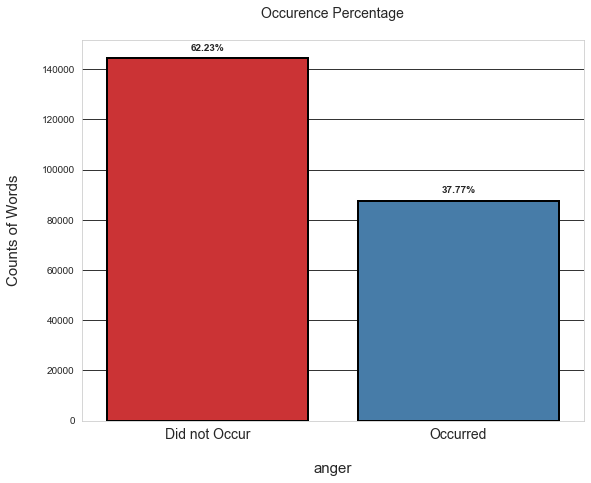

In [101]:
plot_count('joy', 'Occurence Percentage\n', train, size=1)
plot_count('anger', 'Occurence Percentage\n', train, size=1)

## Emotion Comparison Plots: 

In [102]:
angerdf = pd.DataFrame(train['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(train['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(train['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(train['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(train['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(train['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(train['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(train['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(train['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(train['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(train['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [103]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)

masteremotiondf

,index,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
0,0,144418,180975,154433,187668,216841,210310,174169,220148,172871,202416,207408
1,1,87652,51095,77637,44402,15229,21760,57901,11922,59199,29654,24662


In [104]:
masteremotiondfT = masteremotiondf.T

new_header = masteremotiondfT.iloc[0]
masteremotiondfT = masteremotiondfT[1:] 
masteremotiondfT.columns = new_header
masteremotiondfT = masteremotiondfT.reset_index()

masteremotiondfT = masteremotiondfT.sort_values(1)
#masteremotiondfT = masteremotiondfT.sort_values(0)

masteremotiondfT

index,index,0,1
7,pessimism,220148,11922
4,joy,216841,15229
5,love,210310,21760
10,trust,207408,24662
9,surprise,202416,29654
3,fear,187668,44402
1,anticipation,180975,51095
6,optimism,174169,57901
8,sadness,172871,59199
2,disgust,154433,77637


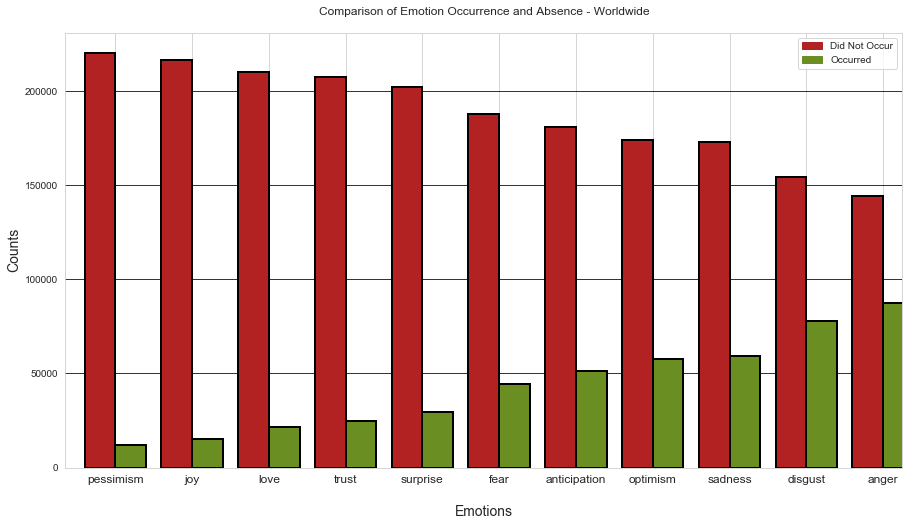

In [105]:
fig = plt.figure()

ax = fig.add_subplot(111) 

width = 0.4

masteremotiondfT[1].plot(kind='bar', color='olivedrab', ax=ax, width=width, position=0, edgecolor='black', linewidth=2)
masteremotiondfT[0].plot(kind='bar', color='firebrick', ax=ax, width=width, position=1, edgecolor='black', linewidth=2)

x = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x1 = list(masteremotiondfT["index"])

ax.set_ylabel('Counts', fontsize=14)
ax.set_xlabel('\nEmotions', fontsize=14)

plt.xticks(x, x1, rotation = 360, ha='center', fontsize=12)

plt.title("Comparison of Emotion Occurrence and Absence - Worldwide\n")

red_patch = mpatches.Patch(color='firebrick', label='Did Not Occur')
green_patch = mpatches.Patch(color='olivedrab', label='Occurred')

plt.legend(handles=[red_patch, green_patch], loc='upper right', fontsize = 10)
#plt.legend(handles=[green_patch], loc='upper left', fontsize = 15)

ax.grid(axis='y', alpha=4, color='black')

plt.show()

<img src="color chart.png">

## Plutchik's Wheel of Emotions Mapping Plot:

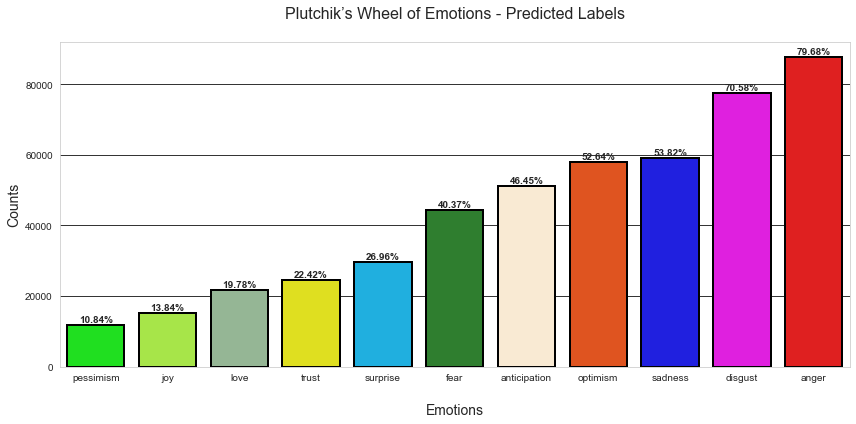

In [106]:
fig = plt.figure(figsize=(12, 6))

ax = fig.add_subplot(111) 

clrs = ["lime", "greenyellow", "darkseagreen", "yellow", "deepskyblue", "forestgreen", "blanchedalmond", "orangered", "blue", "magenta", "r"]

sns.barplot(y=1, x="index", data=masteremotiondfT, palette = clrs, edgecolor='black', linewidth=2)
plt.title('Plutchik’s Wheel of Emotions - Predicted Labels\n', fontsize=16)
ax.set_ylabel('Counts', fontsize=14)
ax.set_xlabel('\nEmotions', fontsize=14)
plt.tight_layout()
ax.grid(axis='y', alpha=4, color='black')

total = float(len(masteremotiondfT))

# For Percentages:
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}%\n'.format(height/total/100),
            ha="center", va='center', fontweight='bold') 

plt.show()

## Emotion Trends via Months Plots: 

In [107]:
train['month'] = pd.DatetimeIndex(train['date']).month

train['month'] = train['month'].apply(lambda x: calendar.month_abbr[x])

train

,status_id,user_id,date,time,text,is_quote,display_text_width,favorite_count,retweet_count,hashtags,symbols,lang,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,month
0,1240849521011113984,840438614,2020-03-20,03:55:54,corona time,False,43,0,0,0,0,en,0,0,0,0,0,0,1,1,0,1,0,Mar
1,1240849520381976576,1143505456121307136,2020-03-20,03:55:54,flexing king u+0001f525,True,16,0,0,0,0,en,0,0,0,0,0,0,0,0,1,0,0,Mar
2,1240849519727857664,3449353153,2020-03-20,03:55:54,everyone looks sick,False,67,0,51508,0,0,en,1,0,1,0,0,0,0,0,0,0,0,Mar
3,1240849521866952704,1511537016,2020-03-20,03:55:54,corona day 3 feels like sunday,False,73,0,89818,0,0,en,0,0,1,0,1,0,0,0,0,0,0,Mar
4,1240849528414244864,334488003,2020-03-20,03:55:56,everyone stay home please corona fucks quickly...,False,140,0,25397,0,0,en,0,0,0,1,0,0,1,0,0,0,0,Mar
5,1240849525423706112,1025415844678049792,2020-03-20,03:55:55,generation z want name folks love calling ever...,False,139,0,103708,0,0,en,1,1,0,0,0,0,1,0,1,0,0,Mar
6,1240849522248404992,1010036490066276352,2020-03-20,03:55:54,hundreds indian doctors frontline covid19 cris...,False,140,0,310,COVID19,0,en,0,0,0,0,0,0,1,1,0,1,0,Mar
7,1240849525109112832,958174420543131648,2020-03-20,03:55:55,kalamojakka prayingmedic literally spokesperso...,False,121,5,0,0,0,en,0,1,0,0,0,0,1,0,0,0,0,Mar
8,1240849520994349056,1080013276459593729,2020-03-20,03:55:54,coronavirus basic general name type virus crow...,False,140,0,6916,0,0,en,1,0,1,0,0,0,1,0,0,0,0,Mar
9,1240849518540677120,1228076185453649920,2020-03-20,03:55:53,jsthefanieeet jughkook animal crossing u+0001f...,False,19,1,0,0,0,en,0,0,0,0,1,1,1,0,0,0,1,Mar


In [108]:
train["date"].unique()

array(['2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
       '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-31', '2020-04-01',
       '2020-04-03'], dtype=object)

In [109]:
date1 = train[train['date'].str.contains("2020-03-20")]
date2 = train[train['date'].str.contains("2020-03-21")]
date3 = train[train['date'].str.contains("2020-03-22")]
date4 = train[train['date'].str.contains("2020-03-23")]
date5 = train[train['date'].str.contains("2020-03-24")]
date6 = train[train['date'].str.contains("2020-03-25")]
date7 = train[train['date'].str.contains("2020-03-26")]
date8 = train[train['date'].str.contains("2020-03-27")]
date9 = train[train['date'].str.contains("2020-03-28")]
date10 = train[train['date'].str.contains("2020-03-29")]
date11 = train[train['date'].str.contains("2020-03-31")]
date12 = train[train['date'].str.contains("2020-04-01")]
date13 = train[train['date'].str.contains("2020-04-03")]

### Date 1:- 

In [110]:
angerdf = pd.DataFrame(date1['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date1['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date1['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date1['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date1['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date1['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date1['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date1['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date1['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date1['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date1['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [111]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-20"})
masteremotiondf1 = masteremotiondf
masteremotiondf1

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,14887,5154,12978,7716,1687,1822,6274,2632,10935,5446,2470


### Date 2:-

In [112]:
angerdf = pd.DataFrame(date2['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date2['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date2['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date2['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date2['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date2['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date2['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date2['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date2['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date2['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date2['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [113]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-21"})
masteremotiondf2 = masteremotiondf
masteremotiondf2

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-21,1756,673,1377,888,221,300,811,321,1095,785,302


### Date 3:-

In [114]:
angerdf = pd.DataFrame(date3['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date3['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date3['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date3['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date3['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date3['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date3['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date3['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date3['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date3['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date3['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [115]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-22"})
masteremotiondf3 = masteremotiondf
masteremotiondf3

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-22,6520,4155,5607,3920,1364,1810,4685,929,4945,2408,2032


### Date 4:-

In [116]:
angerdf = pd.DataFrame(date4['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date4['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date4['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date4['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date4['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date4['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date4['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date4['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date4['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date4['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date4['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [117]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-23"})
masteremotiondf4 = masteremotiondf
masteremotiondf4

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-23,8695,5870,7616,4556,1479,1813,5614,1009,7084,2345,2299


### Date 5:- 

In [118]:
angerdf = pd.DataFrame(date5['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date5['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date5['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date5['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date5['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date5['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date5['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date5['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date5['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date5['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date5['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [119]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-24"})
masteremotiondf5 = masteremotiondf
masteremotiondf5

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-24,7042,4998,6521,4141,1007,1182,4871,683,5342,1998,1577


### Date 6:- 

In [120]:
angerdf = pd.DataFrame(date6['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date6['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date6['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date6['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date6['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date6['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date6['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date6['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date6['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date6['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date6['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [121]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-25"})
masteremotiondf6 = masteremotiondf
masteremotiondf6

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-25,3229,2226,3027,2206,511,598,2463,383,2231,1366,933


### Date 7: 

In [122]:
angerdf = pd.DataFrame(date7['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date7['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date7['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date7['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date7['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date7['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date7['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date7['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date7['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date7['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date7['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [123]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-26"})
masteremotiondf7 = masteremotiondf
masteremotiondf7

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-26,13667,7498,9960,6005,1931,5374,8913,1437,7346,4628,4354


### Date 8:-

In [124]:
angerdf = pd.DataFrame(date8['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date8['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date8['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date8['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date8['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date8['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date8['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date8['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date8['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date8['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date8['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [125]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-27"})
masteremotiondf8 = masteremotiondf
masteremotiondf8

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-27,7181,4523,6656,3447,1136,2789,5846,922,4324,2372,3087


### Date 9:-

In [126]:
angerdf = pd.DataFrame(date9['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date9['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date9['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date9['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date9['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date9['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date9['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date9['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date9['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date9['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date9['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [127]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-28"})
masteremotiondf9 = masteremotiondf
masteremotiondf9

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-28,9425,6844,9454,4260,2226,2587,7241,1500,6502,3600,3062


### Date 10: 

In [128]:
angerdf = pd.DataFrame(date10['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date10['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date10['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date10['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date10['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date10['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date10['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date10['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date10['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date10['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date10['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [129]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-29"})
masteremotiondf10 = masteremotiondf
masteremotiondf10

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-29,3700,2867,3539,1745,1113,1003,2996,456,2379,1233,1338


### Date 11: 

In [130]:
angerdf = pd.DataFrame(date11['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date11['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date11['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date11['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date11['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date11['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date11['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date11['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date11['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date11['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date11['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [131]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-31"})
masteremotiondf11 = masteremotiondf
masteremotiondf11

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-31,4279,2559,3993,2103,1299,1003,3639,621,2611,1504,1611


### Date 12: 

In [132]:
angerdf = pd.DataFrame(date12['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date12['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date12['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date12['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date12['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date12['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date12['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date12['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date12['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date12['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date12['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [133]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-04-01"})
masteremotiondf12 = masteremotiondf
masteremotiondf12

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-04-01,1711,794,1600,695,273,373,1047,257,954,511,408


### Date 13: 

In [134]:
angerdf = pd.DataFrame(date13['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date13['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date13['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date13['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date13['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date13['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date13['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date13['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date13['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date13['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date13['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [135]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-04-03"})
masteremotiondf13 = masteremotiondf
masteremotiondf13

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-04-03,5560,2934,5309,2720,982,1106,3501,772,3451,1458,1189


### Finally: 

In [137]:
Final = pd.concat([masteremotiondf1, masteremotiondf2, masteremotiondf3, masteremotiondf4, masteremotiondf5, masteremotiondf6, masteremotiondf7, masteremotiondf8, masteremotiondf9, masteremotiondf10, masteremotiondf11, masteremotiondf12, masteremotiondf13], axis=0, sort = True)
#Final["Date"] = [1, ]
Final

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,14887,5154,12978,7716,1687,1822,6274,2632,10935,5446,2470
1,2020-03-21,1756,673,1377,888,221,300,811,321,1095,785,302
1,2020-03-22,6520,4155,5607,3920,1364,1810,4685,929,4945,2408,2032
1,2020-03-23,8695,5870,7616,4556,1479,1813,5614,1009,7084,2345,2299
1,2020-03-24,7042,4998,6521,4141,1007,1182,4871,683,5342,1998,1577
1,2020-03-25,3229,2226,3027,2206,511,598,2463,383,2231,1366,933
1,2020-03-26,13667,7498,9960,6005,1931,5374,8913,1437,7346,4628,4354
1,2020-03-27,7181,4523,6656,3447,1136,2789,5846,922,4324,2372,3087
1,2020-03-28,9425,6844,9454,4260,2226,2587,7241,1500,6502,3600,3062
1,2020-03-29,3700,2867,3539,1745,1113,1003,2996,456,2379,1233,1338


### 1) Interpolated Plot:- 

In [140]:
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

x_new = np.linspace(x.min(), x.max(), 75)

Text(0.5, 0, '\n2020-03-20     2020-03-21   2020-03-22   2020-03-23   2020-03-24   2020-03-25   2020-03-26   2020-03-27   2020-03-28   2020-03-29   2020-03-31   2020-04-01    2020-04-03 ')

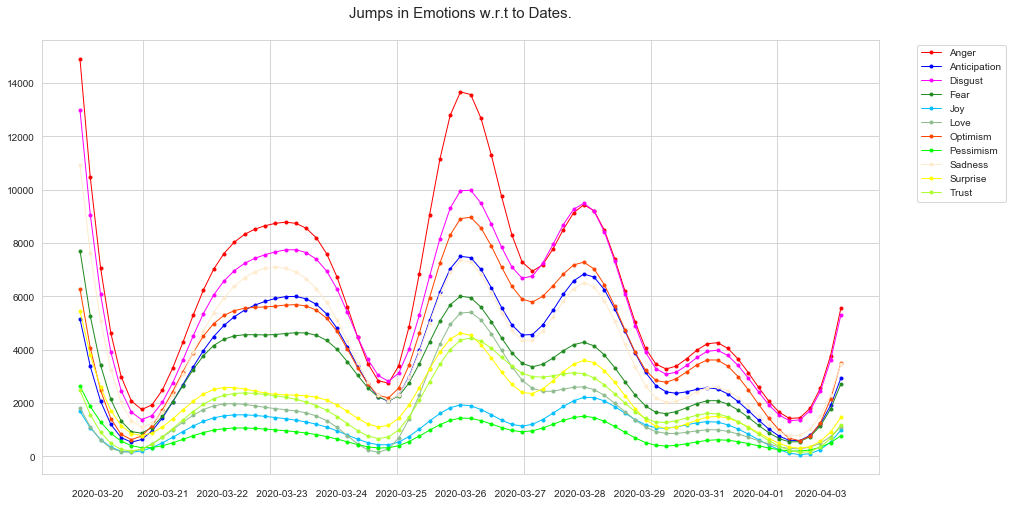

In [141]:
y = np.array(Final["anger"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1, color='r', linewidth=1, label="Anger", linestyle="-")

y = np.array(Final["anticipation"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1, color='blue', linewidth=1, label="Anticipation", linestyle="-")

y = np.array(Final["disgust"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1, color='magenta', linewidth=1, label="Disgust", linestyle="-")

y = np.array(Final["fear"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1, color="forestgreen", linewidth=1, label="Fear", linestyle="-")

y = np.array(Final["joy"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1, color='deepskyblue', linewidth=1, label="Joy", linestyle="-")

y = np.array(Final["love"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1, color="darkseagreen", linewidth=1, label="Love", linestyle="-")

y = np.array(Final["optimism"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1, color="orangered", linewidth=1, label="Optimism", linestyle="-")

y = np.array(Final["pessimism"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1, color='lime', linewidth=1, label="Pessimism", linestyle="-")

y = np.array(Final["sadness"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1, color="blanchedalmond", linewidth=1, label="Sadness", linestyle="-")

y = np.array(Final["surprise"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1, color='yellow', linewidth=1, label="Surprise", linestyle="-")

y = np.array(Final["trust"])
f = interp1d(x, y, kind='cubic')
y_smooth = f(x_new)

plt.plot(x_new, y_smooth, marker='.', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1, color="greenyellow", linewidth=1, label="Trust", linestyle="-")

plt.title("Jumps in Emotions w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

plt.tick_params(labelbottom=False)    

plt.xlabel('\n2020-03-20     2020-03-21   2020-03-22   2020-03-23   2020-03-24   2020-03-25   2020-03-26   2020-03-27   2020-03-28   2020-03-29   2020-03-31   2020-04-01    2020-04-03 ')


### 2) Normal Plot: 

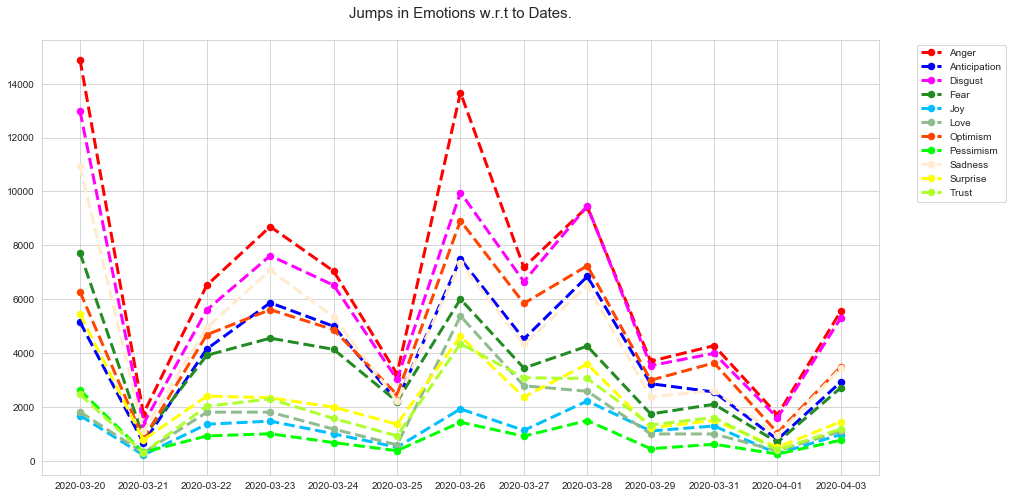

In [210]:
plt.plot('Date', 'anger', data = Final, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'anticipation', data = Final, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")
plt.plot('Date', 'disgust', data = Final, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = Final, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")

plt.plot('Date', 'joy', data = Final, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")
plt.plot('Date', 'love', data = Final, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = Final, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'pessimism', data = Final, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")

plt.plot('Date', 'sadness', data = Final, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")
plt.plot('Date', 'surprise', data = Final, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = Final, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")

plt.title("Jumps in Emotions w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")


## Postive vs. Negative Emotion Scale Comparison Plots: 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

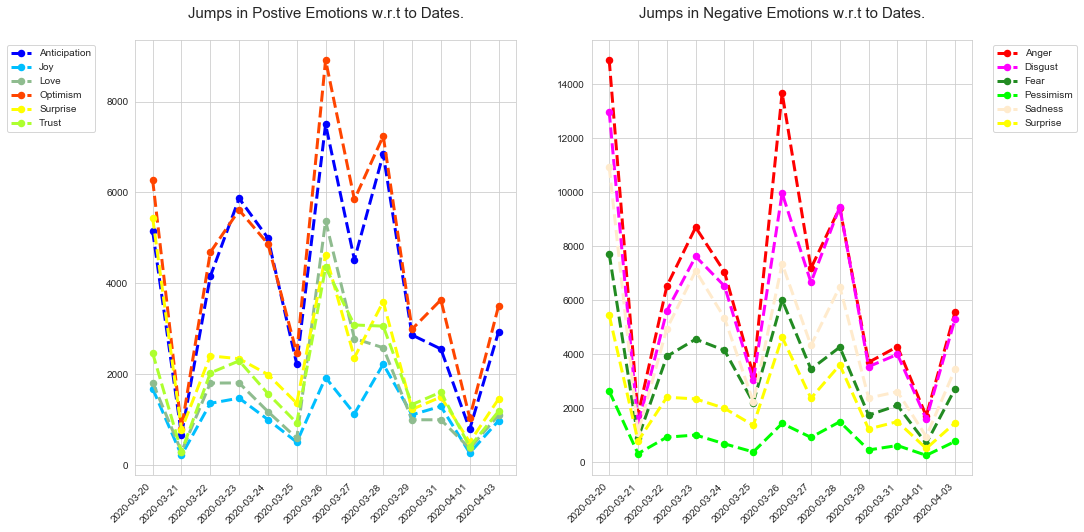

In [163]:
plt.subplot(1, 2, 1)

plt.plot('Date', 'anticipation', data = Final, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")
plt.plot('Date', 'joy', data = Final, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")
plt.plot('Date', 'love', data = Final, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = Final, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'surprise', data = Final, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = Final, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")

plt.title("Jumps in Postive Emotions w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(-0.35, 1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)

plt.plot('Date', 'anger', data = Final, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'disgust', data = Final, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = Final, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")
plt.plot('Date', 'pessimism', data = Final, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")
plt.plot('Date', 'sadness', data = Final, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")
plt.plot('Date', 'surprise', data = Final, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")

plt.title("Jumps in Negative Emotions w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')


## Tweeting Frequency w.r.t Days, Months, Weekday Plots: 

In [116]:
def get_time(df):
    df['date'] = pd.to_datetime(df['date'])
    df['date'] = df['date'].dt.date
    
    df['month'] = pd.DatetimeIndex(df['date']).month
    #df['month'] = df['date'].dt.month
    #df['hour'] = df['Date'].dt.hour
    
    df['dayofweek'] = pd.DatetimeIndex(df['date']).dayofweek
    #df['dayofweek'] = df['date'].dt.dayofweek
    return df
    
train = get_time(train)

output_notebook()

def scatter_plot(cnt_srs, color):
    trace = go.Scatter(
        x = cnt_srs.index,
        y = cnt_srs.values,
        showlegend = False,
        marker = dict(color = color,)
    )
    return trace

def get_time_plots(df):
    print('The dataset start on {} and ends on {}'.format(df['date'].min(), df['date'].max()))
    cnt_srs = df['date'].value_counts().sort_index()
    trace1 = scatter_plot(cnt_srs, 'red')
    cnt_srs = df['month'].value_counts().sort_index()
    trace2 = scatter_plot(cnt_srs, 'blue')
    #cnt_srs = df['hour'].value_counts().sort_index()
    #trace3 = scatter_plot(cnt_srs, 'green')
    cnt_srs = df['dayofweek'].value_counts().sort_index()
    trace4 = scatter_plot(cnt_srs, 'orange')

    #subtitles = ['Date Frequency', 'Month Frequency', 'Hour Frequency', 'Day of Week Frequency']
    subtitles = ['Date Frequency', 'Month Frequency', 'Day of Week Frequency']
    
    fig = subplots.make_subplots(rows = 3, cols = 1, vertical_spacing = 0.08, subplot_titles = subtitles)
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 2, 1)
    #fig.append_trace(trace3, 3, 1)
    fig.append_trace(trace4, 3, 1)
    fig['layout'].update(height = 1200, width = 1000, paper_bgcolor = 'rgb(255,255,255)')
    py.iplot(fig, filename = 'time_plots')

Loading BokehJS ...

In [117]:
get_time_plots(train)

The dataset start on 2020-03-20 and ends on 2020-04-03


## Extracting Location for Tableau Visualizations: 

In [4]:
actloctrain = pd.read_csv(r"C:\Users\Window\Documents\complete_user_location.csv")
actloctrain

,user_id,location
0,840438614,NaN
1,1143505456121307136,Indonesia
2,3449353153,NaN
3,1511537016,NaN
4,334488003,NaN
5,1025415844678049792,NaN
6,1010036490066276352,NaN
7,958174420543131648,NaN
8,1080013276459593729,"Perak, Malaysia"
9,1228076185453649920,skyla :)


In [5]:
loctrain = train

finalocdata = pd.merge(loctrain, actloctrain, on='user_id')

finalocdata

,status_id,user_id,date,time,text,is_quote,display_text_width,favorite_count,retweet_count,hashtags,symbols,lang,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,location
0,1240849521011113984,840438614,2020-03-20,03:55:54,corona time,False,43,0,0,0,0,en,0,0,0,0,0,0,1,1,0,1,0,NaN
1,1240849520381976576,1143505456121307136,2020-03-20,03:55:54,flexing king u+0001f525,True,16,0,0,0,0,en,0,0,0,0,0,0,0,0,1,0,0,Indonesia
2,1240849519727857664,3449353153,2020-03-20,03:55:54,everyone looks sick,False,67,0,51508,0,0,en,1,0,1,0,0,0,0,0,0,0,0,NaN
3,1240849521866952704,1511537016,2020-03-20,03:55:54,corona day 3 feels like sunday,False,73,0,89818,0,0,en,0,0,1,0,1,0,0,0,0,0,0,NaN
4,1240849528414244864,334488003,2020-03-20,03:55:56,everyone stay home please corona fucks quickly...,False,140,0,25397,0,0,en,0,0,0,1,0,0,1,0,0,0,0,NaN
5,1240849525423706112,1025415844678049792,2020-03-20,03:55:55,generation z want name folks love calling ever...,False,139,0,103708,0,0,en,1,1,0,0,0,0,1,0,1,0,0,NaN
6,1240849522248404992,1010036490066276352,2020-03-20,03:55:54,hundreds indian doctors frontline covid19 cris...,False,140,0,310,COVID19,0,en,0,0,0,0,0,0,1,1,0,1,0,NaN
7,1240849525109112832,958174420543131648,2020-03-20,03:55:55,kalamojakka prayingmedic literally spokesperso...,False,121,5,0,0,0,en,0,1,0,0,0,0,1,0,0,0,0,NaN
8,1240849520994349056,1080013276459593729,2020-03-20,03:55:54,coronavirus basic general name type virus crow...,False,140,0,6916,0,0,en,1,0,1,0,0,0,1,0,0,0,0,"Perak, Malaysia"
9,1240849518540677120,1228076185453649920,2020-03-20,03:55:53,jsthefanieeet jughkook animal crossing u+0001f...,False,19,1,0,0,0,en,0,0,0,0,1,1,1,0,0,0,1,skyla :)


In [6]:

#loctrain = pd.read_csv(r"C:\Users\Window\Documents\English_tweets + L + L.csv")

#loctrain = train

#print(loctrain.shape)

finalocdata = finalocdata[finalocdata['location'].notna()]

finalocdata = finalocdata.where(pd.notnull(finalocdata), 0)

finalocdata = finalocdata.astype({"display_text_width": int, "favorite_count": int, "retweet_count": int, "anger": int, "anticipation": int, "disgust": int, "fear": int, "joy": int, "love": int, "optimism": int, "pessimism": int, "sadness": int, "surprise": int, "trust": int})

finalocdata = finalocdata[finalocdata['location'].apply(lambda x: isinstance(x, (str, bytes)))]
finalocdata.location = finalocdata.location.str.replace('[^a-zA-Z]', ' ')
finalocdata.location = finalocdata.location.str.replace('   ', '')


fl = list(finalocdata["location"])
#fll = [item for item in fl if str(item).isalpha()]

finalocdata

,status_id,user_id,date,time,text,is_quote,display_text_width,favorite_count,retweet_count,hashtags,symbols,lang,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,location
1,1240849520381976576,1143505456121307136,2020-03-20,03:55:54,flexing king u+0001f525,True,16,0,0,0,0,en,0,0,0,0,0,0,0,0,1,0,0,Indonesia
8,1240849520994349056,1080013276459593729,2020-03-20,03:55:54,coronavirus basic general name type virus crow...,False,140,0,6916,0,0,en,1,0,1,0,0,0,1,0,0,0,0,Perak Malaysia
9,1240849518540677120,1228076185453649920,2020-03-20,03:55:53,jsthefanieeet jughkook animal crossing u+0001f...,False,19,1,0,0,0,en,0,0,0,0,1,1,1,0,0,0,1,skyla
10,1240849518058295296,1040242057724321792,2020-03-20,03:55:53,much money diverted corona care government abl...,False,276,0,0,0,0,en,0,0,1,0,1,0,1,0,0,1,0,Tamil Nadu India
11,1242316092397121536,1040242057724321792,2020-03-24,05:03:32,corruption corona deadly dangerous former dest...,False,276,2,2,"c(""TamilNadu"", ""Politics"", ""womenintech"", ""Tha...",0,en,1,0,1,0,0,0,0,0,0,0,0,Tamil Nadu India
12,1242325465563426816,1040242057724321792,2020-03-24,05:40:46,kind vow taken cm care taken implement measure...,False,140,0,1,0,0,en,1,0,1,0,0,0,0,0,0,0,0,Tamil Nadu India
13,1243406692370399232,1040242057724321792,2020-03-27,05:17:11,fate played role unexpected situation like cor...,False,140,0,1,0,0,en,1,0,1,1,0,0,0,0,0,0,0,Tamil Nadu India
14,1243410679941357568,1040242057724321792,2020-03-27,05:33:02,appreciated,False,56,0,1,0,0,en,0,0,0,0,0,0,0,0,0,0,0,Tamil Nadu India
15,1240849515286073344,805332940968300544,2020-03-20,03:55:52,corona virus corona virus outside summer,False,70,0,35,0,0,en,1,0,1,0,0,0,0,1,0,0,0,miami dade
16,1242327777459699712,805332940968300544,2020-03-24,05:49:58,miss ex miss life without corona virus,False,70,0,81853,0,0,en,0,0,0,0,1,1,1,0,0,1,1,miami dade


In [7]:
#display(pd.DataFrame(fll[:72]))

#loctrain.shape

fl

['Indonesia',
 'Perak  Malaysia',
 'skyla',
 'Tamil Nadu  India',
 'Tamil Nadu  India',
 'Tamil Nadu  India',
 'Tamil Nadu  India',
 'Tamil Nadu  India',
 'miami dade',
 'miami dade',
 'EggIsUniversal',
 'kerala',
 'my own head',
 'high af ',
 'The Wards',
 'Leeds  England',
 'Magog  Qu bec',
 'San Antonio  TX',
 'mins away',
 'mins away',
 'kuala lumpur',
 'Kano  Nigeria',
 'Shreveport  Louisiana',
 'San Francisco  CA',
 'Los Angeles Westhollywood CA',
 'Paviljoen III',
 'Psalms',
 'Mobile  AL',
 'Indonesia',
 'Texas  USA',
 'Marechal Hermes  Rio de Janeir',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'not portland  oregon',
 'Bay Area',
 'New York NY',
 '  India',
 '',
 'Belton  TX',
 'Htx Dtx',
 'Mayag ez  Puerto Rico',
 'btspop  

In [9]:
fl.count("pakistan")

14

In [10]:
loclatlong = []

url = 'http://photon.komoot.de/api/?q='

#addresses = ['Lahore', 'Sialkot, Pakistan']

addresses = fl

for address in addresses:
    resp = requests.get(url=url+address)
    data = json.loads(resp.text)
    if 'features' in data.keys():
        try:                    
            print(data['features'][0]['geometry']['coordinates'])
            loclatlong.append(data['features'][0]['geometry']['coordinates'])
        except IndexError:
            loclatlong.append(list("Index Error Occurred"))
    else:
        print (data['message'])
        loclatlong.append(data['message'])

[117.8902853, -2.4833826]
[100.9276057, 4.7916539]
[114.13054877825, 22.28312335]
[78.3665347, 10.9094334]
[78.3665347, 10.9094334]
[78.3665347, 10.9094334]
[78.3665347, 10.9094334]
[78.3665347, 10.9094334]
[-80.4989467, 25.6364246]
[-80.4989467, 25.6364246]
[76.5120396, 10.3528744]
[-62.8388129, 44.7469704]
[18.436188, -34.0932582]
[-64.5606496, 45.410402]
[-1.5437941, 53.7974185]
[-72.1783632, 45.1849901]
[-98.57591494690699, 29.49119005]
[-8.4891235, 43.2807341]
[-8.4891235, 43.2807341]
[101.6943028, 3.1516636]
[8.5303654, 11.9918671]
[-93.7651944, 32.5221828]
[-122.4199061, 37.7790262]
[-118.2427666, 34.0536909]
[18.039102225891888, 59.3626402]
[125.6169328, 7.1184918]
[-88.0430541, 30.6943566]
[117.8902853, -2.4833826]
[-102.6163092, 33.4870424]
[-43.3704561, -22.8599658]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.5008922]
[-122.7016849, 45.50089

[-2.5859217, 6.7991892]
[-2.5859217, 6.7991892]
[-2.5859217, 6.7991892]
[73.86342072022893, 17.3565267]
[75.30567675, 33.7083909]
[75.30567675, 33.7083909]
[-120.5907252, 35.1185869]
[-76.176758, 36.854024]
[123.9701831, 10.2935883]
[-123.14829191802562, 48.667412600000006]
[77.55364499971128, 12.94514225]
[-76.9641007, 38.948879]
[-73.93928034602104, 40.814705950000004]
[-73.93928034602104, 40.814705950000004]
[101.04188828673873, 1.4737173000000001]
[-123.32814009114388, 42.42482835]
[-123.32814009114388, 42.42482835]
[-82.6695085, 27.7703796]
[-73.99625393609625, 40.72925325]
[-73.99625393609625, 40.72925325]
[-73.99625393609625, 40.72925325]
[84.6897321, 20.5431241]
[-98.37085940431805, 25.8366364]
[-58.43562340522388, -34.61612315]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25.22695365]
[55.34347023658998, 25

[-121.4943996, 38.5815719]
[-73.99625393609625, 40.72925325]
[-94.1861679, 35.995508]
[30.8797222, -29.805]
[77.4445372, 28.711241]
[77.4445372, 28.711241]
[-94.0560643, 44.0109722]
[153.5153077, -28.5926666]
[-118.437652, 34.28497]
[-88.7248197, 42.2533549]
[101.304146, 3.2083304]
[71.247499, 30.3308401]
[-55.8298705181416, -27.340362499999998]
[-87.41873323571241, 39.33615105]
[-97.6705137, 39.4850226]
[-85.66814415034243, 38.214528650000005]
[34.8924472, 32.5018388]
[-78.0000547, 24.7736546]
[-75.23521278969667, 39.875018]
[-74.2606974, 40.8936131]
[-73.99625393609625, 40.72925325]
[-79.95915937754226, 45.218731000000005]
[9.940049045563535, 51.536585099999996]
[-112.2336817, 34.6648536]
[32.5813539, 0.3177137]
[32.5813539, 0.3177137]
[32.5813539, 0.3177137]
[32.5813539, 0.3177137]
[32.5813539, 0.3177137]
[32.5813539, 0.3177137]
[-88.7836442, 42.2624109]
[-88.7836442, 42.2624109]
[-83.4868961, 42.3076547]
[-2.991665, 53.407154]
[-77.44577247609614, 37.53551775]
[-83.46470417747767, 

[-97.3819147, 37.6921063]
[17.7578122, 11.5024338]
[-118.32793627262319, 33.92058175]
[-88.6708853, 34.2653842]
[9.8282255, 44.107033]
[153.0977913, -27.4881211]
[77.312843, 28.5089437]
[-6.928127662295216, 53.85157235]
[114.1857978100035, 22.349215549999997]
[-78.3095169, -5.8956638]
[78.6677428, 22.3511148]
[-100.4458825, 39.7837304]
[9.076415687487948, 45.5172625]
[-79.7599337, 43.6858146]
[3.1759224, 42.3533988]
[-4.9138141, 41.3083299]
[76.33093721292319, 30.238955599999997]
[139.2394179, 36.5748441]
[-91.56295, 31.643839]
[-86.5859011, 34.729847]
[-77.0365529, 38.8948932]
[-77.0365529, 38.8948932]
[108.4265113, 13.2904027]
[-90.3084017323959, 38.64724015]
[-84.37322951720375, 33.7910822]
[78.46106473453146, 17.38878595]
[78.46106473453146, 17.38878595]
[-122.6741949, 45.5202471]
[22.0541733, 46.9599823]
[31.101736311877314, -26.302985550000002]
[-9.422071032564071, 53.53908605]
[73.23586552517415, 19.2716301]
[-98.78891577330901, 20.10445165]
[-157.9752974, 21.3988565]
[43.324980

[-80.1936589, 25.7742658]
[-101.81995710355704, 21.533030099999998]
[-0.13200607515005947, 51.5080874]
[-80.41599593671438, 26.06762135]
[77.5912997, 12.9791198]
[-100.4458825, 39.7837304]
[73.8544541, 18.521428]
[-82.97217315, 39.34645965]
[-86.000977, 50.000678]
[-122.574848700247, 45.5799384]
[119.4447732, -5.1729815]
[105.222242, 16.7995585]
[-1.791816, 51.5121969]
[-71.47105695565182, 41.60399245]
[-107.2275523, 33.1680687]
[-118.1736641, 34.0759547]
[-100.4458825, 39.7837304]
[78.6677428, 22.3511148]
[78.6677428, 22.3511148]
[-2.7517907, 42.9763742]
[78.6677428, 22.3511148]
[-0.472528, 51.7511784]
[-0.472528, 51.7511784]
[4.375304132256188, 50.83879505]
[-117.64642031789684, 33.979251000000005]
[-118.1366153, 34.6981064]
[-122.3300624, 47.6038321]
[-75.19078391488154, 39.88771115]
[-79.387207, 43.653963]
[-56.1913569, -34.9059039]
[-104.9848623, 39.7392364]
[-118.2427666, 34.0536909]
[75.42839037281816, 18.81821525]
[-0.1276474, 51.5073219]
[-0.1276474, 51.5073219]
[-2.6992717, 5

[80.2838331, 13.0801721]
[80.2838331, 13.0801721]
[-74.272384, 41.3245369]
[-87.6244212, 41.8755616]
[-82.2023691, 38.809803]
[-3.0793008, 57.2053788]
[87.0719382462062, 26.49557585]
[-118.5612714, 34.2818164]
[178.0759145, -18.2498536]
[-0.6986223249706658, 52.00423175]
[-71.0738284, 19.5718704]
[-71.0738284, 19.5718704]
[-71.0738284, 19.5718704]
[-83.9849477, 42.4347571]
[-105.013041, 49.1344098]
[-127.1218822, 52.122961]
[-122.3558473, 37.7884969]
[-74.0060152, 40.7127281]
[101.304146, 3.2083304]
[-100.4458825, 39.7837304]
[-7.87824, 4.92434]
[-53.2, -10.3333333]
[-66.1109318, 8.0018709]
[-9.5915845, 53.2543612]
[74.3141775, 31.5656079]
[74.3141775, 31.5656079]
[-84.37322951720375, 33.7910822]
[-117.64642031789684, 33.979251000000005]
[-97.1466695, 31.549333]
[-77.0222541, 38.8996378]
[-77.0222541, 38.8996378]
[-106.57880619642194, 35.05733214999999]
[-118.7559974, 36.7014631]
[-112.2336817, 34.6648536]
[-89.098797, 46.596853]
[151.2164539, -33.8548157]
[-122.7141049, 38.4404925]
[-

[121.17858456498469, 14.5851258]
[-77.3219227, 37.2315065]
[-77.3219227, 37.2315065]
[-85.1551411, 37.5726028]
[87.2690219, 26.8117292]
[-77.0365529, 38.8948932]
[-118.353132, 33.9562003]
[151.4212652, -33.3099653]
[125.5353237, 7.0445277]
[7.9999721, 9.6000359]
[-49.24956388072541, -25.4568365]
[77.2022662, 28.6141793]
[-89.9132695, 35.1172406]
[77.5912997, 12.9791198]
[-86.76900017959787, 36.1384121]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[39.667169, -4.05052]
[-73.9495823, 40.6501038]
[-73.9495823, 40.6501038]
[68.3750376, 25.3801017]
[-0.0706443204025044, 51.5161126]
[43.398382018489485, 6.402589949999999]
[168, 9]
[-80.41599593671438, 26.06762135]
[-117.911732, 33.8347516]
[-122.6744557, 45.6306954]
[81.38609761204991, 26.93823105]
[-100.4458825, 39.7837304]
[-77.0365256, -12.0621065]
[-77.0222541, 38.8996378]
[-118.4069746,

[153.350791, -28.2550955]
[4.351697, 50.8465573]
[73.1942567, 22.2973142]
[-123.1120061895052, 49.2766905]
[78.46106473453146, 17.38878595]
[-94.5811109, 39.0987467]
[-84.4852469, 42.7355416]
[43.743561, 16.198469]
[73.5315802, 26.3746911]
[-60.9821067, 10.8677845]
[-77.3947693, 18.1850507]
[-77.3947693, 18.1850507]
[-7.090938510074202, 52.54307695]
[-88.4067604, 44.2611337]
[-96.5952703, 32.9762327]
[-88.0840212, 41.5263603]
[-76.17248945485272, 43.06922635]
[-102.6163092, 33.4870424]
[-102.6163092, 33.4870424]
[-97.2684063, 34.9550817]
[-97.3323318, 32.7546987]
[-97.3323318, 32.7546987]
[78.6677428, 22.3511148]
[72.8353355, 18.9387711]
[100.1366858, 15.9705604]
[-103.0634955470374, 31.239475300000002]
[5.0393225, 47.3236379]
[-118.2427666, 34.0536909]
[-118.2427666, 34.0536909]
[-113.507996, 53.535411]
[-107.9917071, 61.0666922]
[-71.0582912, 42.3602534]
[-118.3483256, 33.9188589]
[-120.9968782, 37.6390972]
[98.26785829127267, 2.52988165]
[98.26785829127267, 2.52988165]
[-117.6464203

[-117.3008784, 34.4263886]
[-77.68316035176696, 43.76012025]
[-71.549149, 43.133061]
[76.93229411712989, 29.052829850000002]
[-79.387207, 43.653963]
[-0.13200607515005947, 51.5080874]
[-2.8747898, 54.0681534]
[-76.5324943, 3.4517923]
[-76.5324943, 3.4517923]
[-2.4276431, 38.4717913]
[-91.1946063, 30.5236116]
[-73.9495823, 40.6501038]
[-61.8222516, 17.079128]
[-106.0606545, 35.5917071]
[84.0917139, 28.1083929]
[84.0917139, 28.1083929]
[17.1349237, 39.0803663]
[77.5, 26.166667]
[77.5, 26.166667]
[77.5, 26.166667]
[117.8902853, -2.4833826]
[-84.37322951720375, 33.7910822]
[-77.0222541, 38.8996378]
[99.23139706254156, 20.236531499999998]
[-118.3961877, 34.1483989]
[-98.57591494690699, 29.49119005]
[-80.41599593671438, 26.06762135]
[-80.41599593671438, 26.06762135]
[-80.41599593671438, 26.06762135]
[-90.26766771346345, 39.74884075]
[-90.26766771346345, 39.74884075]
[-95.3676974, 29.7589382]
[92.71605974430346, 26.30414915]
[-108.4854701, 38.2506477]
[-3.1883749, 55.9533456]
[72.8353355, 18.

[151.256132, -23.8431724]
[-1.5549930613333238, 54.00777805]
[-95.3676974, 29.7589382]
[-80.1936589, 25.7742658]
[54.9443453, 59.0100254]
[-122.9206347, 46.9162816]
[-122.9206347, 46.9162816]
[113.646867, 2.3926225]
[21.498346935519812, 54.0796754]
[107.4385651, 13.7547124]
[-86.0035699, 39.9525933]
[-96.5311007, 32.9106791]
[-83.918931, 31.836944]
[-80.1936589, 25.7742658]
[-80.1936589, 25.7742658]
[-1.3183522, 52.9874762]
[-8.79459935, 52.8107539]
[-94.0560643, 44.0109722]
[105.222242, 16.7995585]
[-79.03578891739357, 35.04360255]
[151.2164539, -33.8548157]
[-118.2427666, 34.0536909]
[-87.71453, 43.7508284]
[-77.0365529, 38.8948932]
[-90.05779634336011, 29.96137865]
[-117.1835214, 32.7529512]
[78.6677428, 22.3511148]
[78.6677428, 22.3511148]
[123.75440907106241, 10.47755175]
[78.6677428, 22.3511148]
[78.6677428, 22.3511148]
[-118.2427666, 34.0536909]
[-73.99625393609625, 40.72925325]
[-80.0728201, 26.4614625]
[29.894378, 31.199004]
[76.9628425, 11.0018115]
[76.9628425, 11.0018115]
[7

[-117.1627714, 32.7174209]
[-3.5377646, 48.566374]
[-100.4458825, 39.7837304]
[106.142532, 16.937614]
[-94.6759627, 38.9047533]
[-0.1276474, 51.5073219]
[-2.1358386, 49.2214561]
[-51.42592, -23.415296]
[-76.9382069, 39.5162234]
[-118.2427666, 34.0536909]
[-81.5115214, 28.6779683]
[-111.8980294981148, 33.626676950000004]
[-84.37322951720375, 33.7910822]
[-77.0222541, 38.8996378]
[-77.0222541, 38.8996378]
[39.667169, -4.05052]
[144.9597309161635, -38.36077]
[144.9597309161635, -38.36077]
[144.9597309161635, -38.36077]
[11.5664631, 48.1896585]
[-73.99625393609625, 40.72925325]
[-96.80745701907065, 43.66000635]
[-83.0466403, 42.3315509]
[35.36075970421772, 32.25223965]
[-122.3558473, 37.7884969]
[-63.98548240934779, 44.9674222]
[-81.6934446, 41.5051613]
[-115.14183186108524, 36.107155399999996]
[114.1857978100035, 22.349215549999997]
[35.2715481, 0.5198329]
[-80.1936589, 25.7742658]
[-83.918931, 31.836944]
[-75.65171583027285, 41.39405205]
[152.96014230229218, -27.5677062]
[-96.3164764, 30

[80.39659721265238, 8.690350550000002]
[-118.2427666, 34.0536909]
[17.3231107, -23.2335499]
[17.3231107, -23.2335499]
[-122.3558473, 37.7884969]
[10.4234469, 51.0834196]
[-113.507996, 53.535411]
[-118.0308396, 33.9708782]
[10.9032872, 63.445531]
[14.310380861315789, 48.807716299999996]
[-122.29223214472336, 47.1610235]
[-99.0139503, 19.5802159]
[13.3888599, 52.5170365]
[-80.14612392627231, 26.050783950000003]
[-80.14612392627231, 26.050783950000003]
[-118.2427666, 34.0536909]
[106.74389124027667, -6.16156235]
[-0.1276474, 51.5073219]
[-83.24151285076053, 42.3619061]
[-87.67113846918389, 41.8810409]
[-96.750768, 33.209583]
[-118.2427666, 34.0536909]
[-80.2756379, 40.6016151]
[-0.24310122505133433, 52.5653667]
[-74.0126129, 40.7118914]
[-76.5324943, 3.4517923]
[-103.0634955470374, 31.239475300000002]
[-74.06972757770764, 40.9102686]
[-74.06972757770764, 40.9102686]
[-74.1911991, 40.7912143]
[6.2747786, 4.9334651]
[147.2869493, -31.8759835]
[-99.0591324, 19.4307824]
[-118.1916048, 33.7690

[-107.9917071, 61.0666922]
[77.55364499971128, 12.94514225]
[77.55364499971128, 12.94514225]
[77.55364499971128, 12.94514225]
[77.55364499971128, 12.94514225]
[-117.64642031789684, 33.979251000000005]
[78.6677428, 22.3511148]
[-98.57591494690699, 29.49119005]
[113.669601, 36.5694846]
[105.6158483222973, 9.692096849999999]
[144.9631608, -37.8142176]
[73.8544541, 18.521428]
[-117.7974031, 50.2396111]
[-86.6309875, 46.2652316]
[-98.57591494690699, 29.49119005]
[-95.7623767483299, 39.0385293]
[-100.0000375, 22.5000485]
[-75.65171583027285, 41.39405205]
[14.398182, 50.1411008]
[-115.1485163, 36.1672559]
[98.26785829127267, 2.52988165]
[-117.1627714, 32.7174209]
[77.5951301, 12.9455189]
[-122.678128, 45.5270896]
[72.8353355, 18.9387711]
[72.8353355, 18.9387711]
[72.8353355, 18.9387711]
[22.2567044, 56.0972906]
[-97.3323318, 32.7546987]
[-122.34930359883187, 47.6205131]
[-122.2688522, 37.5600336]
[12.850247561323528, 52.23093605]
[-80.1936589, 25.7742658]
[101.7549643, 3.0765023]
[77.5919, 13

KeyboardInterrupt: 

In [230]:
loclatlong

[[78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [96.4597226, 27.6891712],
 [96.4597226, 27.6891712],
 [-97.2684063, 34.9550817],
 [-97.2684063, 34.9550817],
 [-97.2684063, 34.9550817],
 [-84.3901849, 33.7490987],
 ['I',
  'n',
  'd',
  'e',
  'x',
  ' ',
  'E',
  'r',
  'r',
  'o',
  'r',
  ' ',
  'O',
  'c',
  'c',
  'u',
  'r',
  'r',
  'e',
  'd'],
 [91.8731646, 25.5803088],
 [91.8731646, 25.5803088],
 [91.8731646, 25.5803088],
 [91.8731646, 25.5803088],
 [91.8731646, 25.5803088],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 [78.6677428, 22.3511148],
 ['I',
  'n',
  'd',
  'e',
  'x',
  ' ',
  '

In [231]:
lll = pd.DataFrame(loclatlong)
#lll
df1 = lll.iloc[:, 0:2]
df1

,0,1
0,78.6677,22.3511
1,78.6677,22.3511
2,78.6677,22.3511
3,78.6677,22.3511
4,78.6677,22.3511
5,96.4597,27.6892
6,96.4597,27.6892
7,-97.2684,34.9551
8,-97.2684,34.9551
9,-97.2684,34.9551


In [303]:
finalocdata.reset_index(drop=True, inplace=True)
df1.reset_index(drop=True, inplace=True)

finallocllldf = pd.concat([finalocdata, df1], axis=1)
finallocllldf = finallocllldf.rename(columns={0: "lat", 1: "long"})

finallocllldf = finallocllldf[finallocllldf.lat != "I"]

print(finallocllldf)

AttributeError: 'DataFrame' object has no attribute 'lat'

In [236]:
# Checks:

finallocllldf["lat"].isnull().values.any()
finallocllldf["long"].isnull().values.any()


False

In [237]:
finallocllldf.to_csv('TableauLocDataPart2.csv', encoding='utf-8')

## Locational Data Plots: 

In [5]:
#plotloctrain = pd.read_csv(r"C:\Users\Window\Documents\TableauLocDataPart2.csv")

plotloctrain = pd.read_csv(r"C:\Users\Window\Downloads\TableauLocDataFinal.csv")

plotloctrain = plotloctrain.loc[:, ~plotloctrain.columns.str.contains('^Unnamed')]

plotloctrain = plotloctrain.rename(columns={'lat': 'long', 'long':'lat'})

display(plotloctrain)

,status_id,user_id,date,time,text,is_quote,display_text_width,favorite_count,retweet_count,hashtags,symbols,lang,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust,location,long,lat
0,1240849520381976576,1143505456121307136,2020-03-20,03:55:54,flexing king u+0001f525,True,16,0,0,0,0,en,0,0,0,0,0,0,0,0,1,0,0,Indonesia,117.890285,-2.483383
1,1240849520994349056,1080013276459593729,2020-03-20,03:55:54,coronavirus basic general name type virus crow...,False,140,0,6916,0,0,en,1,0,1,0,0,0,1,0,0,0,0,Perak Malaysia,100.927606,4.791654
2,1240849518540677120,1228076185453649920,2020-03-20,03:55:53,jsthefanieeet jughkook animal crossing u+0001f...,False,19,1,0,0,0,en,0,0,0,0,1,1,1,0,0,0,1,skyla,114.130549,22.283123
3,1240849518058295296,1040242057724321792,2020-03-20,03:55:53,much money diverted corona care government abl...,False,276,0,0,0,0,en,0,0,1,0,1,0,1,0,0,1,0,Tamil Nadu India,78.366535,10.909433
4,1242316092397121536,1040242057724321792,2020-03-24,05:03:32,corruption corona deadly dangerous former dest...,False,276,2,2,"c(""TamilNadu"", ""Politics"", ""womenintech"", ""Tha...",0,en,1,0,1,0,0,0,0,0,0,0,0,Tamil Nadu India,78.366535,10.909433
5,1242325465563426816,1040242057724321792,2020-03-24,05:40:46,kind vow taken cm care taken implement measure...,False,140,0,1,0,0,en,1,0,1,0,0,0,0,0,0,0,0,Tamil Nadu India,78.366535,10.909433
6,1243406692370399232,1040242057724321792,2020-03-27,05:17:11,fate played role unexpected situation like cor...,False,140,0,1,0,0,en,1,0,1,1,0,0,0,0,0,0,0,Tamil Nadu India,78.366535,10.909433
7,1243410679941357568,1040242057724321792,2020-03-27,05:33:02,appreciated,False,56,0,1,0,0,en,0,0,0,0,0,0,0,0,0,0,0,Tamil Nadu India,78.366535,10.909433
8,1240849515286073344,805332940968300544,2020-03-20,03:55:52,corona virus corona virus outside summer,False,70,0,35,0,0,en,1,0,1,0,0,0,0,1,0,0,0,miami dade,-80.498947,25.636425
9,1242327777459699712,805332940968300544,2020-03-24,05:49:58,miss ex miss life without corona virus,False,70,0,81853,0,0,en,0,0,0,0,1,1,1,0,0,1,1,miami dade,-80.498947,25.636425


In [173]:
loc1 = plotloctrain[plotloctrain['location'].str.contains("Italy")]
loc2 = plotloctrain[plotloctrain['location'].str.contains("Pakistan")]
loc3 = plotloctrain[plotloctrain['location'].str.contains("USA")]
loc4 = plotloctrain[plotloctrain['location'].str.contains("Iran")]

In [174]:
loc1["date"].unique()

array(['2020-03-20', '2020-03-21'], dtype=object)

In [175]:
date1 = loc1[loc1['date'].str.contains("2020-03-20")]

### Italy - Date 1:- 

In [176]:
angerdf = pd.DataFrame(date1['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date1['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date1['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date1['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date1['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date1['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date1['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date1['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date1['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date1['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date1['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [177]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]


masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-20"})
masteremotiondfItaly1 = masteremotiondf
masteremotiondfItaly1

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,4,0,4,2,0,0,1,0,2,1,0


### Finally: 

In [178]:
FinalItaly = masteremotiondfItaly1
#FinalI["Date"] = [1, ]
FinalItaly

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,4,0,4,2,0,0,1,0,2,1,0


In [206]:
loc2["date"].unique()

array(['2020-03-20', '2020-03-24', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-04-01', '2020-04-03', '2020-03-25',
       '2020-03-23', '2020-03-21', '2020-03-29', '2020-03-31',
       '2020-03-22'], dtype=object)

In [207]:
date1 = loc2[loc2['date'].str.contains("2020-03-20")]
date2 = loc2[loc2['date'].str.contains("2020-03-21")]
#date3 = loc2[loc2['date'].str.contains("2020-03-22")]
date4 = loc2[loc2['date'].str.contains("2020-03-23")]
date5 = loc2[loc2['date'].str.contains("2020-03-24")]
date6 = loc2[loc2['date'].str.contains("2020-03-25")]
date7 = loc2[loc2['date'].str.contains("2020-03-26")]
date8 = loc2[loc2['date'].str.contains("2020-03-27")]
date9 = loc2[loc2['date'].str.contains("2020-03-28")]
date10 = loc2[loc2['date'].str.contains("2020-03-29")]
date11 = loc2[loc2['date'].str.contains("2020-03-31")]
#date12 = loc2[loc2['date'].str.contains("2020-04-01")]
date13 = loc2[loc2['date'].str.contains("2020-04-03")]

### Pakistan - Date 1:- 

In [208]:
angerdf = pd.DataFrame(date1['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date1['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date1['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date1['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date1['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date1['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date1['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date1['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date1['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date1['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date1['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [209]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-20"})
masteremotiondfPak1 = masteremotiondf
masteremotiondfPak1

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,100,41,86,63,9,8,45,22,79,39,18


### Pakistan - Date 2:-

In [210]:
angerdf = pd.DataFrame(date2['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date2['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date2['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date2['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date2['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date2['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date2['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date2['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date2['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date2['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date2['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [211]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-21"})
masteremotiondfPak2 = masteremotiondf
masteremotiondfPak2

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-21,3,0,3,1,0,3,2,1,3,2,1


### Pakistan - Date 4:-

In [212]:
angerdf = pd.DataFrame(date4['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date4['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date4['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date4['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date4['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date4['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date4['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date4['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date4['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date4['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date4['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [213]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-23"})
masteremotiondfPak4 = masteremotiondf
masteremotiondfPak4

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-23,0,0,0,1,0,0,0,0,1,1,0


### Pakistan - Date 5:- 

In [214]:
angerdf = pd.DataFrame(date5['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date5['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date5['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date5['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date5['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date5['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date5['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date5['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date5['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date5['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date5['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [215]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-24"})
masteremotiondfPak5 = masteremotiondf
masteremotiondfPak5

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-24,0,0,0,0,0,0,1,0,0,0,0


### Pakistan - Date 6:- 

In [216]:
angerdf = pd.DataFrame(date6['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date6['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date6['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date6['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date6['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date6['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date6['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date6['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date6['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date6['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date6['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [217]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-25"})
masteremotiondfPak6 = masteremotiondf
masteremotiondfPak6

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-25,2,0,2,2,0,0,0,1,1,0,0


### Pakistan - Date 7: 

In [218]:
angerdf = pd.DataFrame(date7['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date7['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date7['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date7['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date7['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date7['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date7['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date7['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date7['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date7['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date7['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [219]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-26"})
masteremotiondfPak7 = masteremotiondf
masteremotiondfPak7

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-26,3,1,1,3,0,0,2,0,2,3,2


### Pakistan - Date 8:-

In [220]:
angerdf = pd.DataFrame(date8['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date8['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date8['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date8['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date8['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date8['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date8['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date8['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date8['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date8['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date8['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [221]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-27"})
masteremotiondfPak8 = masteremotiondf
masteremotiondfPak8

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-27,3,2,5,4,1,0,2,0,4,1,1


### Pakistan - Date 9:-

In [222]:
angerdf = pd.DataFrame(date9['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date9['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date9['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date9['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date9['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date9['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date9['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date9['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date9['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date9['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date9['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [223]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-28"})
masteremotiondfPak9 = masteremotiondf
masteremotiondfPak9

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-28,6,1,6,1,1,2,3,0,4,3,2


### Pakistan - Date 10  

In [224]:
angerdf = pd.DataFrame(date10['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date10['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date10['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date10['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date10['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date10['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date10['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date10['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date10['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date10['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date10['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [225]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-29"})
masteremotiondfPak10 = masteremotiondf
masteremotiondfPak10


,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-29,1,0,1,0,0,0,1,0,0,1,1


### Pakistan - Date 11  

In [226]:
angerdf = pd.DataFrame(date11['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date11['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date11['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date11['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date11['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date11['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date11['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date11['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date11['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date11['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date11['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [227]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-31"})
masteremotiondfPak11 = masteremotiondf
masteremotiondfPak11


,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-31,0,0,1,1,1,0,1,0,0,0,1


### Pakistan - Date 13:

In [228]:
angerdf = pd.DataFrame(date13['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date13['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date13['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date13['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date13['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date13['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date13['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date13['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date13['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date13['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date13['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [229]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-04-03"})
masteremotiondfPak13 = masteremotiondf
masteremotiondfPak13


,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-04-03,4,3,6,4,2,0,1,1,4,0,0


### Finally: 

In [230]:
FinalPak = pd.concat([masteremotiondfPak1, masteremotiondfPak2, masteremotiondfPak4, masteremotiondfPak5, masteremotiondfPak6, masteremotiondfPak7, masteremotiondfPak8, masteremotiondfPak9, masteremotiondfPak10, masteremotiondfPak11, masteremotiondfPak13], axis=0, sort = True)
#FinalI["Date"] = [1, ]
FinalPak

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,100,41,86,63,9,8,45,22,79,39,18
1,2020-03-21,3,0,3,1,0,3,2,1,3,2,1
1,2020-03-23,0,0,0,1,0,0,0,0,1,1,0
1,2020-03-24,0,0,0,0,0,0,1,0,0,0,0
1,2020-03-25,2,0,2,2,0,0,0,1,1,0,0
1,2020-03-26,3,1,1,3,0,0,2,0,2,3,2
1,2020-03-27,3,2,5,4,1,0,2,0,4,1,1
1,2020-03-28,6,1,6,1,1,2,3,0,4,3,2
1,2020-03-29,1,0,1,0,0,0,1,0,0,1,1
1,2020-03-31,0,0,1,1,1,0,1,0,0,0,1


In [232]:
loc3["date"].unique()

array(['2020-03-20', '2020-03-24', '2020-03-25', '2020-03-26',
       '2020-03-27', '2020-03-22', '2020-03-31', '2020-03-28',
       '2020-03-23', '2020-03-21', '2020-03-29', '2020-04-01',
       '2020-04-03'], dtype=object)

In [288]:
date1 = loc3[loc3['date'].str.contains("2020-03-20")]
date2 = loc3[loc3['date'].str.contains("2020-03-21")]
date3 = loc3[loc3['date'].str.contains("2020-03-22")]
date4 = loc3[loc3['date'].str.contains("2020-03-23")]
date5 = loc3[loc3['date'].str.contains("2020-03-24")]
date6 = loc3[loc3['date'].str.contains("2020-03-25")]
date7 = loc3[loc3['date'].str.contains("2020-03-26")]
date8 = loc3[loc3['date'].str.contains("2020-03-27")]
date9 = loc3[loc3['date'].str.contains("2020-03-28")]
#date10 = loc3[loc3['date'].str.contains("2020-03-29")]
date11 = loc3[loc3['date'].str.contains("2020-03-31")]
#date12 = loc3[loc3['date'].str.contains("2020-04-01")]
date13 = loc3[loc3['date'].str.contains("2020-04-03")]

### USA - Date 1:

In [289]:
angerdf = pd.DataFrame(date1['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date1['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date1['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date1['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date1['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date1['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date1['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date1['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date1['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date1['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date1['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [290]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-20"})
masteremotiondfUSA1 = masteremotiondf
masteremotiondfUSA1

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,724,252,632,374,82,83,307,138,542,276,118


### USA - Date 2:-

In [291]:
angerdf = pd.DataFrame(date2['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date2['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date2['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date2['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date2['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date2['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date2['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date2['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date2['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date2['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date2['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [292]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-21"})
masteremotiondfUSA2 = masteremotiondf
masteremotiondfUSA2

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-21,56,28,46,29,8,4,24,14,34,33,8


### USA - Date 3: 

In [293]:
angerdf = pd.DataFrame(date3['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date3['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date3['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date3['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date3['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date3['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date3['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date3['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date3['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date3['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date3['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [294]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-22"})
masteremotiondfUSA3 = masteremotiondf
masteremotiondfUSA3

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-22,5,2,5,1,2,0,5,4,4,5,0


### USA - Date 4:-

In [295]:
angerdf = pd.DataFrame(date4['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date4['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date4['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date4['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date4['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date4['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date4['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date4['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date4['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date4['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date4['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [296]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-23"})
masteremotiondfUSA4 = masteremotiondf
masteremotiondfUSA4

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-23,6,2,3,3,0,0,1,0,6,3,2


### USA - Date 5:- 

In [297]:
angerdf = pd.DataFrame(date5['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date5['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date5['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date5['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date5['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date5['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date5['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date5['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date5['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date5['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date5['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [298]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-24"})
masteremotiondfUSA5 = masteremotiondf
masteremotiondfUSA5

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-24,6,6,5,4,0,1,5,0,4,1,0


### USA - Date 6:- 

In [299]:
angerdf = pd.DataFrame(date6['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date6['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date6['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date6['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date6['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date6['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date6['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date6['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date6['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date6['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date6['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [300]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-25"})
masteremotiondfUSA6 = masteremotiondf
masteremotiondfUSA6

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-25,3,0,2,1,0,0,2,0,2,2,0


### USA - Date 7: 

In [301]:
angerdf = pd.DataFrame(date7['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date7['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date7['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date7['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date7['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date7['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date7['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date7['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date7['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date7['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date7['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [302]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-26"})
masteremotiondfUSA7 = masteremotiondf
masteremotiondfUSA7

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-26,10,6,6,5,3,4,5,1,5,1,3


### USA - Date 8:-

In [303]:
angerdf = pd.DataFrame(date8['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date8['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date8['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date8['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date8['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date8['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date8['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date8['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date8['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date8['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date8['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [304]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-27"})
masteremotiondfUSA8 = masteremotiondf
masteremotiondfUSA8

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-27,2,3,1,1,1,0,4,0,2,1,2


### USA - Date 9:-

In [305]:
angerdf = pd.DataFrame(date9['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date9['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date9['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date9['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date9['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date9['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date9['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date9['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date9['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date9['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date9['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [306]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-28"})
masteremotiondfUSA9 = masteremotiondf
masteremotiondfUSA9

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-28,1,2,3,0,0,2,3,0,1,0,1


### USA - Date 11  

In [307]:
angerdf = pd.DataFrame(date11['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date11['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date11['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date11['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date11['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date11['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date11['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date11['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date11['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date11['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date11['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [308]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-03-31"})
masteremotiondfUSA11 = masteremotiondf
masteremotiondfUSA11


,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-31,5,2,3,2,1,1,3,1,3,2,2


### USA - Date 13:

In [309]:
angerdf = pd.DataFrame(date13['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date13['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date13['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date13['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date13['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date13['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date13['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date13['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date13['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date13['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date13['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [310]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({1: "2020-04-03"})
masteremotiondfUSA13 = masteremotiondf
masteremotiondfUSA13


,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-04-03,1,1,0,1,0,1,1,1,0,1,0


### Finally: 

In [311]:
FinalUSA = pd.concat([masteremotiondfUSA1, masteremotiondfUSA2, masteremotiondfUSA3, masteremotiondfUSA4, masteremotiondfUSA5, masteremotiondfUSA6, masteremotiondfUSA7, masteremotiondfUSA8, masteremotiondfUSA9, masteremotiondfUSA11, masteremotiondfUSA13], axis=0, sort = True)
#FinalI["Date"] = [1, ]
FinalUSA

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,724,252,632,374,82,83,307,138,542,276,118
1,2020-03-21,56,28,46,29,8,4,24,14,34,33,8
1,2020-03-22,5,2,5,1,2,0,5,4,4,5,0
1,2020-03-23,6,2,3,3,0,0,1,0,6,3,2
1,2020-03-24,6,6,5,4,0,1,5,0,4,1,0
1,2020-03-25,3,0,2,1,0,0,2,0,2,2,0
1,2020-03-26,10,6,6,5,3,4,5,1,5,1,3
1,2020-03-27,2,3,1,1,1,0,4,0,2,1,2
1,2020-03-28,1,2,3,0,0,2,3,0,1,0,1
1,2020-03-31,5,2,3,2,1,1,3,1,3,2,2


In [313]:
loc4["date"].unique()

array(['2020-03-20'], dtype=object)

In [314]:
date1 = loc4[loc4['date'].str.contains("2020-03-20")]

### Iran - Date 1: 

In [315]:
angerdf = pd.DataFrame(date1['anger'].value_counts())
angerdf = angerdf.reset_index()

anticipationdf = pd.DataFrame(date1['anticipation'].value_counts())
anticipationdf = anticipationdf.reset_index()
anticipationdf = anticipationdf.drop(columns="index")

disgustdf = pd.DataFrame(date1['disgust'].value_counts())
disgustdf = disgustdf.reset_index()
disgustdf = disgustdf.drop(columns="index")

feardf = pd.DataFrame(date1['fear'].value_counts())
feardf = feardf.reset_index()
feardf = feardf.drop(columns="index")

joydf = pd.DataFrame(date1['joy'].value_counts())
joydf = joydf.reset_index()
joydf = joydf.drop(columns="index")

lovedf = pd.DataFrame(date1['love'].value_counts())
lovedf = lovedf.reset_index()
lovedf = lovedf.drop(columns="index")

optimismdf = pd.DataFrame(date1['optimism'].value_counts())
optimismdf = optimismdf.reset_index()
optimismdf = optimismdf.drop(columns="index")

pessimismdf = pd.DataFrame(date1['pessimism'].value_counts())
pessimismdf = pessimismdf.reset_index()
pessimismdf = pessimismdf.drop(columns="index")

sadnessdf = pd.DataFrame(date1['sadness'].value_counts())
sadnessdf = sadnessdf.reset_index()
sadnessdf = sadnessdf.drop(columns="index")

surprisedf = pd.DataFrame(date1['surprise'].value_counts())
surprisedf = surprisedf.reset_index()
surprisedf = surprisedf.drop(columns="index")

trustdf = pd.DataFrame(date1['trust'].value_counts())
trustdf = trustdf.reset_index()
trustdf = trustdf.drop(columns="index")

In [317]:
# Master DF:

masteremotiondf = pd.concat([angerdf, anticipationdf, disgustdf, feardf, joydf, lovedf, optimismdf, \
               pessimismdf, sadnessdf, surprisedf, trustdf], axis=1, sort=False)

#masteremotiondf = masteremotiondf[:-1]

masteremotiondf = masteremotiondf.fillna(0)
masteremotiondf = masteremotiondf.astype(int)
masteremotiondf = masteremotiondf.drop(0)
masteremotiondf = masteremotiondf.rename(columns={'index': "Date"})
masteremotiondf['Date'] = masteremotiondf['Date'].map({0: "2020-03-20"})
masteremotiondfIran1 = masteremotiondf
masteremotiondfIran1

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,2,2,2,3,1,0,0,0,2,0,0


In [322]:
FinalIran = masteremotiondfIran1
#FinalI["Date"] = [1, ]

FinalIran.loc[2] = ["2020-03-28", 80, 23, 2, 11, 1, 40, 43, 0, 17, 1, 56]

FinalIran

,Date,anger,anticipation,disgust,fear,joy,love,optimism,pessimism,sadness,surprise,trust
1,2020-03-20,2,2,2,3,1,0,0,0,2,0,0
2,2020-03-28,80,23,2,11,1,40,43,0,17,1,56


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

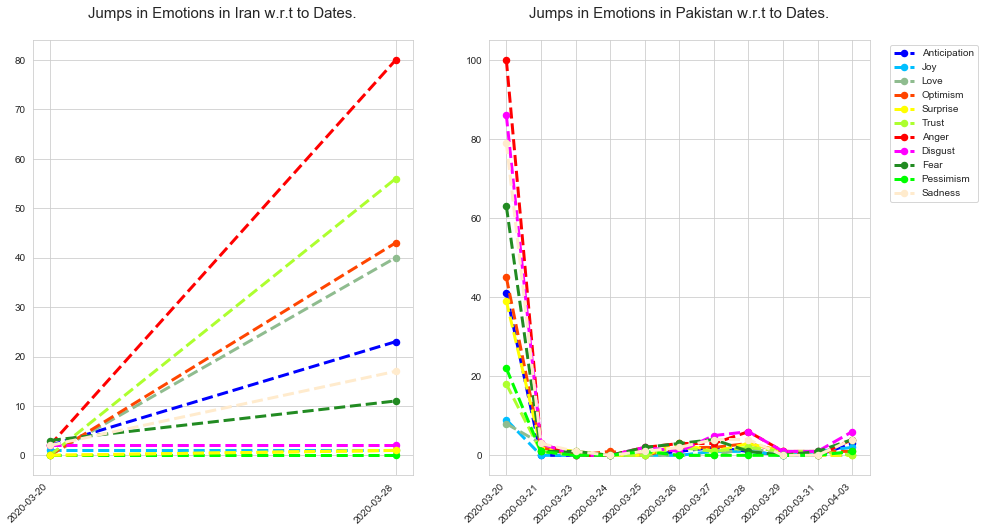

In [323]:
plt.subplot(1, 2, 1)

plt.plot('Date', 'anticipation', data = FinalIran, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")

plt.plot('Date', 'joy', data = FinalIran, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")

#for x,y in zip(FinalI["Date"], FinalI["joy"]):
#    label = "{:.2f}".format(y)
#    plt.annotate(label,
#                 (x, y),
#                 textcoords="offset points",
#                 xytext=(0,10),
#                 ha='center')

plt.plot('Date', 'love', data = FinalIran, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = FinalIran, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'surprise', data = FinalIran, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = FinalIran, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")
plt.plot('Date', 'anger', data = FinalIran, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'disgust', data = FinalIran, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = FinalIran, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")
plt.plot('Date', 'pessimism', data = FinalIran, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")
plt.plot('Date', 'sadness', data = FinalIran, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")
plt.plot('Date', 'surprise', data = FinalIran, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")

plt.title("Jumps in Emotions in Iran w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
#plt.legend(bbox_to_anchor=(-0.35, 1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)

plt.plot('Date', 'anticipation', data = FinalPak, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")
plt.plot('Date', 'joy', data = FinalPak, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")
plt.plot('Date', 'love', data = FinalPak, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = FinalPak, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'surprise', data = FinalPak, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = FinalPak, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")
plt.plot('Date', 'anger', data = FinalPak, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'disgust', data = FinalPak, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = FinalPak, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")
plt.plot('Date', 'pessimism', data = FinalPak, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")
plt.plot('Date', 'sadness', data = FinalPak, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")

plt.title("Jumps in Emotions in Pakistan w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], <a list of 11 Text xticklabel objects>)

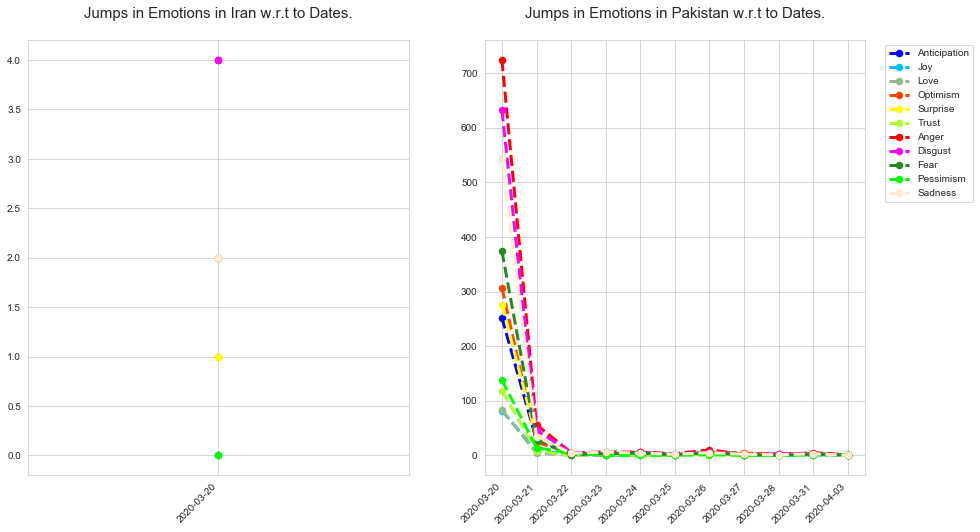

In [324]:
plt.subplot(1, 2, 1)

plt.plot('Date', 'anticipation', data = FinalItaly, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")

plt.plot('Date', 'joy', data = FinalItaly, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")

#for x,y in zip(FinalI["Date"], FinalI["joy"]):
#    label = "{:.2f}".format(y)
#    plt.annotate(label,
#                 (x, y),
#                 textcoords="offset points",
#                 xytext=(0,10),
#                 ha='center')

plt.plot('Date', 'love', data = FinalItaly, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = FinalItaly, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'surprise', data = FinalItaly, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = FinalItaly, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")
plt.plot('Date', 'anger', data = FinalItaly, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'disgust', data = FinalItaly, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = FinalItaly, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")
plt.plot('Date', 'pessimism', data = FinalItaly, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")
plt.plot('Date', 'sadness', data = FinalItaly, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")
plt.plot('Date', 'surprise', data = FinalItaly, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")

plt.title("Jumps in Emotions in Iran w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
#plt.legend(bbox_to_anchor=(-0.35, 1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')

plt.subplot(1, 2, 2)

plt.plot('Date', 'anticipation', data = FinalUSA, marker='o', markerfacecolor='blue', markeredgecolor='blue', markeredgewidth=1.5, color='blue', linewidth=3, label="Anticipation", linestyle="--")
plt.plot('Date', 'joy', data = FinalUSA, marker='o', markerfacecolor='deepskyblue', markeredgecolor='deepskyblue', markeredgewidth=1.5, color='deepskyblue', linewidth=3, label="Joy", linestyle="--")
plt.plot('Date', 'love', data = FinalUSA, marker='o', markerfacecolor='darkseagreen', markeredgecolor='darkseagreen', markeredgewidth=1.5, color="darkseagreen", linewidth=3, label="Love", linestyle="--")
plt.plot('Date', 'optimism', data = FinalUSA, marker='o', markerfacecolor='orangered', markeredgecolor='orangered', markeredgewidth=1.5, color="orangered", linewidth=3, label="Optimism", linestyle="--")
plt.plot('Date', 'surprise', data = FinalUSA, marker='o', markerfacecolor='yellow', markeredgecolor='yellow', markeredgewidth=1.5, color='yellow', linewidth=3, label="Surprise", linestyle="--")
plt.plot('Date', 'trust', data = FinalUSA, marker='o', markerfacecolor='greenyellow', markeredgecolor='greenyellow', markeredgewidth=1.5, color="greenyellow", linewidth=3, label="Trust", linestyle="--")
plt.plot('Date', 'anger', data = FinalUSA, marker='o', markerfacecolor='r', markeredgecolor='r', markeredgewidth=1.5, color='r', linewidth=3, label="Anger", linestyle="--")
plt.plot('Date', 'disgust', data = FinalUSA, marker='o', markerfacecolor='magenta', markeredgecolor='magenta', markeredgewidth=1.5, color='magenta', linewidth=3, label="Disgust", linestyle="--")
plt.plot('Date', 'fear', data = FinalUSA, marker='o', markerfacecolor='forestgreen', markeredgecolor='forestgreen', markeredgewidth=1.5, color="forestgreen", linewidth=3, label="Fear", linestyle="--")
plt.plot('Date', 'pessimism', data = FinalUSA, marker='o', markerfacecolor='lime', markeredgecolor='lime', markeredgewidth=1.5, color='lime', linewidth=3, label="Pessimism", linestyle="--")
plt.plot('Date', 'sadness', data = FinalUSA, marker='o', markerfacecolor='blanchedalmond', markeredgecolor='blanchedalmond', markeredgewidth=1.5, color="blanchedalmond", linewidth=3, label="Sadness", linestyle="--")

plt.title("Jumps in Emotions in Pakistan w.r.t to Dates.\n", fontsize = 15)

#plt.legend()
plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")
plt.xticks(rotation=45, horizontalalignment='right')


In [253]:
#data = {'Id':  [1, 2, 3, 4, 5],
#        'Timestamp': ['2013-08-12 10:29:19.673', '2013-08-13 10:29:20.687', '2013-09-14 10:29:20.687', '2013-10-14 10:29:20.687', '2013-11-15 10:29:20.687'],
#        'Data': [40.0, 50.0, 40.0, 30.0, 50.0],
#        'Group':[1, 2, 3, 4, 5]
#        }

#df1 = pd.DataFrame (data, columns = ['Id','Timestamp', 'Data', 'Group'])

#import plotly.express as px
#fig = px.line(df1, 'Timestamp', 'Data')
#fig.show()

In [327]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["anticipation"], name='anticipation',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blue'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["joy"], name='joy',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'deepskyblue'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["love"], name='love',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'darkseagreen'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["optimism"], name='optimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'orange'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["surprise"], name='surprise',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'yellow'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["trust"], name='trust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'greenyellow'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["anger"], name='anger',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'red'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["disgust"], name='disgust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'magenta'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["fear"], name='fear',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'forestgreen'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["pessimism"], name='pessimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'lime'}))

fig.add_trace(go.Scatter(x=FinalI["Date"], y=FinalI["sadness"], name='sadness',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blanchedalmond'}))

fig.update_layout(title={
        'text': "Jumps in Emotions in USA w.r.t to Dates.",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
        xaxis_title='Dates',
        yaxis_title='Counts', template="plotly_white", width=1000, height=600, margin=dict(l=30, r=30, b=100, t=100, pad=20
    ))

NameError: name 'FinalI' is not defined

In [302]:
fig = make_subplots(rows=2, cols=1, subplot_titles=("Jumps in Emotions in India w.r.t to Dates.", "Jumps in Emotions in USA w.r.t to Dates."))

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["anticipation"], name='anticipation',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blue'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["joy"], name='joy',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'deepskyblue'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["love"], name='love',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'darkseagreen'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["optimism"], name='optimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'orange'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["surprise"], name='surprise',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'yellow'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["trust"], name='trust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'greenyellow'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["anger"], name='anger',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'red'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["disgust"], name='disgust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'magenta'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["fear"], name='fear',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'forestgreen'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["pessimism"], name='pessimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'lime'}), row=1, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalI["sadness"], name='sadness',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blanchedalmond'}), row=1, col=1)

# USA

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["anticipation"], name='anticipation',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blue'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["joy"], name='joy',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'deepskyblue'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["love"], name='love',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'darkseagreen'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["optimism"], name='optimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'orange'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["surprise"], name='surprise',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'yellow'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["trust"], name='trust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'greenyellow'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["anger"], name='anger',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'red'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["disgust"], name='disgust',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'magenta'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["fear"], name='fear',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'forestgreen'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["pessimism"], name='pessimism',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'lime'}, showlegend=False), row=2, col=1)

fig.append_trace(go.Scatter(x=FinalI["Date"], y=FinalUSA["sadness"], name='sadness',
                    mode='lines+markers', 
                    marker={ 
                    'symbol': 'circle', 
                    'size': 10},line={'dash': 'dot', 'width': 4, 'color':'blanchedalmond'}, showlegend=False), row=2, col=1)

fig.update_xaxes(title_text="Dates", row=1, col=1)
fig.update_xaxes(title_text="Dates", row=2, col=1)

fig.update_yaxes(title_text="Counts", row=1, col=1)
fig.update_yaxes(title_text="Counts", row=2, col=1)


fig.update_layout(title={
        'text': " ",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}, template="plotly_white", height=1000, margin=dict(l=30, r=30, b=100, t=120, pad=20), showlegend=True)